In [94]:
# Data Extraction
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'Diamonds-Prices2022.csv'
df = pd.read_csv(file_name)

In [95]:
# Data Cleaning
print(f"Original number of rows: {len(df)}")

df_cleaned = df[(df['x'] != 0.0) & (df['y'] != 0.0) & (df['z'] != 0.0)]

print(f"Number of rows after cleaning: {len(df_cleaned)}")

print(f"Number of rows removed: {len(df) - len(df_cleaned)}")

df_cleaned = df_cleaned.reset_index(drop=True)

print(df_cleaned.head())

Original number of rows: 53943
Number of rows after cleaning: 53923
Number of rows removed: 20
   id  carat      cut color clarity  depth  table  price     x     y     z
0   1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [96]:
# Data Reduction
df_cleaned['volume'] = df_cleaned['x'] * df_cleaned['y'] * df_cleaned['z']

volume_filter = df_cleaned['volume'].quantile(0.99)
carat_filter_lower = df_cleaned['carat'].quantile(0.01)
carat_filter_upper = df_cleaned['carat'].quantile(0.99)

df_cleaned['surface_area'] = 2*(df_cleaned['x'] + df_cleaned['y'] + df_cleaned['z'])
sa_filter = df_cleaned['surface_area']

filtered_df = df_cleaned[(df_cleaned['volume'] <= volume_filter)]
filtered_df = filtered_df[(filtered_df['carat'] >= carat_filter_lower) & (filtered_df['carat'] <= carat_filter_upper)]

filtered_df = filtered_df.reset_index(drop=True)
filtered_df = filtered_df.drop(columns=['id'])

display(filtered_df.sort_values(by="surface_area", ascending=True))

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,surface_area
39189,0.24,Good,F,IF,65.1,58.0,492,3.86,3.88,2.52,37.741536,20.52
39185,0.24,Good,E,VVS2,65.0,58.0,492,3.85,3.90,2.52,37.837800,20.54
27629,0.24,Very Good,E,VS2,64.1,59.0,362,3.88,3.92,2.50,38.024000,20.60
62,0.24,Premium,G,VVS1,62.3,59.0,554,3.95,3.92,2.45,37.935800,20.64
27975,0.24,Very Good,G,VVS1,62.3,59.0,432,3.92,3.95,2.45,37.935800,20.64
...,...,...,...,...,...,...,...,...,...,...,...,...
26760,2.14,Premium,F,SI2,58.2,61.0,17742,8.50,8.45,4.93,354.097250,43.76
24073,2.10,Premium,J,VS2,58.3,54.0,12401,8.49,8.45,4.94,354.398070,43.76
26258,2.13,Very Good,G,SI2,57.9,60.0,16462,8.41,8.56,4.91,353.468936,43.76
26717,2.14,Very Good,F,SI2,58.2,61.0,17582,8.45,8.50,4.93,354.097250,43.76


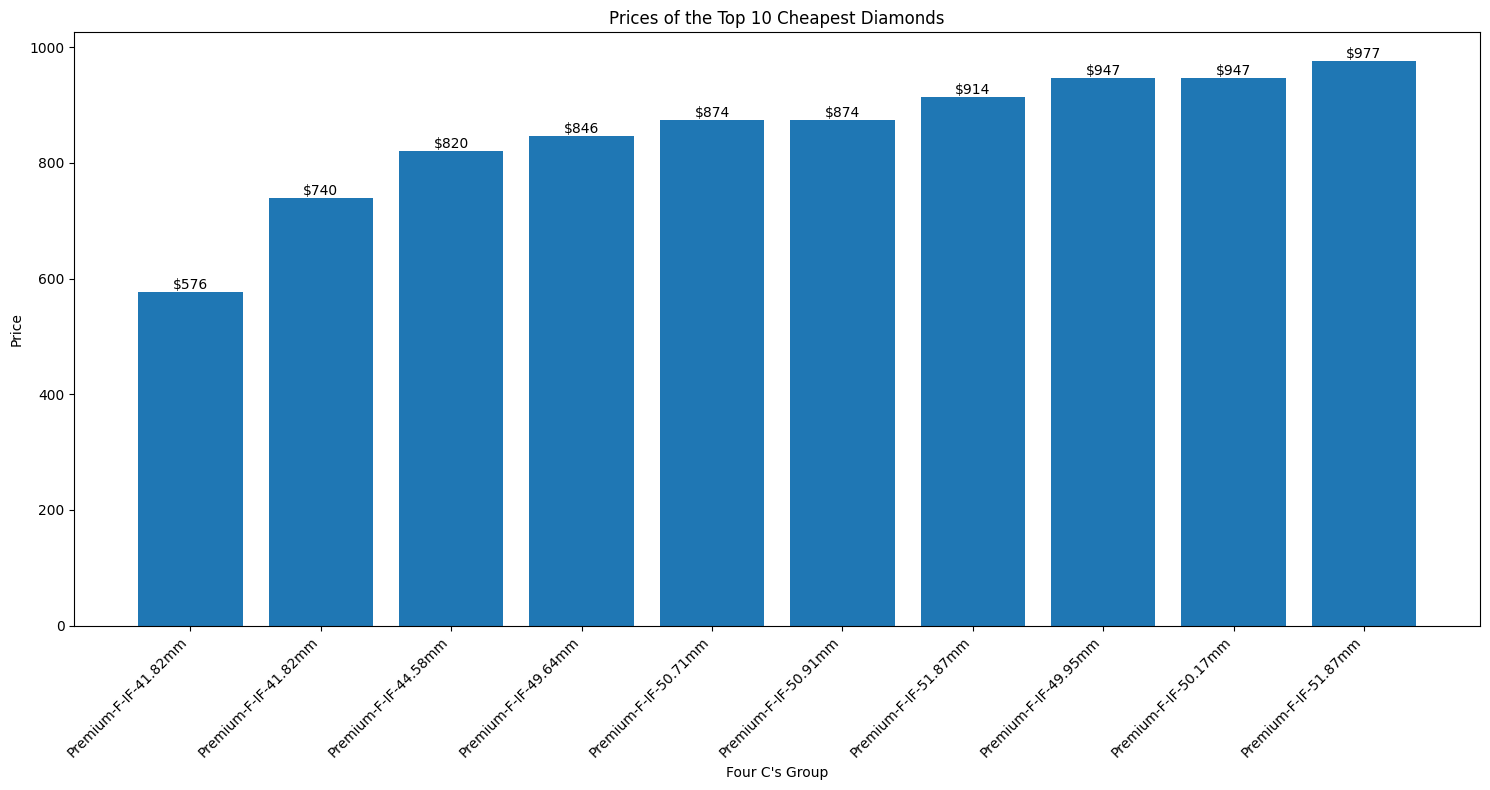

In [99]:
# Prices of the Top 10 Cheapest Diamonds
specific_cut = 'Premium'
specific_color = 'F'
specific_clarity = 'IF'

# Filter the DataFrame for the specific combination
specific_diamonds = filtered_df[(filtered_df['cut'] == specific_cut) & 
                       (filtered_df['color'] == specific_color) & 
                       (filtered_df['clarity'] == specific_clarity)]

lowest_price = specific_diamonds['price'].min()
lowest_price_diamonds = specific_diamonds[specific_diamonds['price'] == lowest_price]

N = 10
top_groups = specific_diamonds.sort_values('price', ascending=True).head(N)

# Create labels for x-axis
labels = [f"{row['cut']}-{row['color']}-{row['clarity']}-{round(row['volume'], 2)}mm" for _, row in top_groups.iterrows()]

# Create the bar plot
plt.figure(figsize=(15, 8))
plt.bar(range(N), top_groups['price'])

# Customize the plot
plt.title(f"Prices of the Top {N} Cheapest Diamonds")
plt.xlabel("Four C's Group")
plt.ylabel('Price')
plt.xticks(range(N), labels, rotation=45, ha='right')

# Add value labels on top of each bar
for i, price in enumerate(top_groups['price']):
    plt.text(i, price, f'${price:,.0f}', ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()